<a href="https://colab.research.google.com/github/khoatran02/khoatran02-Fire_detection_with_Yolov7/blob/main/Fire_detection_with_Yolov7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
# Clone source code YOLOv7 về thư mục Yolov7_train
%cd /content/drive/MyDrive/yolov7_train
!git clone https://github.com/augmentedstartups/yolov7.git #https://github.com/WongKinYiu/yolov7

In [ ]:
import opendatasets as od
od.download(
    "https://www.kaggle.com/datasets/phylake1337/fire-dataset")
#  link dataset
#{"username":"trnhonganhkhoa","key":"e60cbed63c7999af3a91e18c4e851878"}

In [ ]:
# Cài đặt các thư viện cần thiết để train YOLOv7
%cd /content/yolov7
!pip install -r requirements.txt


In [ ]:
# Tải weight pretrain về để nhận diện thử
%cd /content/yolov7
!mkdir pretrain
%cd pretrain
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

In [ ]:
# Tải ảnh sample từ internet
%cd /content/yolov7
!mkdir test_images
%cd test_images
!wget https://cdn.theculturetrip.com/wp-content/uploads/2017/11/15271255494_fcc90d3f9b_k.jpg
!wget https://cdnimgen.vietnamplus.vn/t620/uploaded/wbxx/2020_05_13/85896_3585300525545474_a1.jpg
!wget https://media-cdn-v2.laodong.vn/Storage/NewsPortal/2020/4/22/800234/Chay-Pho-Co-9.jpg
!wget https://i-vnexpress.vnecdn.net/2019/03/23/chay-1-3737-1553317413.jpg

In [ ]:
# Nhận diện thử với weight pretrain 
%cd /content/yolov7
!python detect.py --weights pretrain/yolov7.pt --source /content/yolov7/test_images/15271255494_fcc90d3f9b_k.jpg

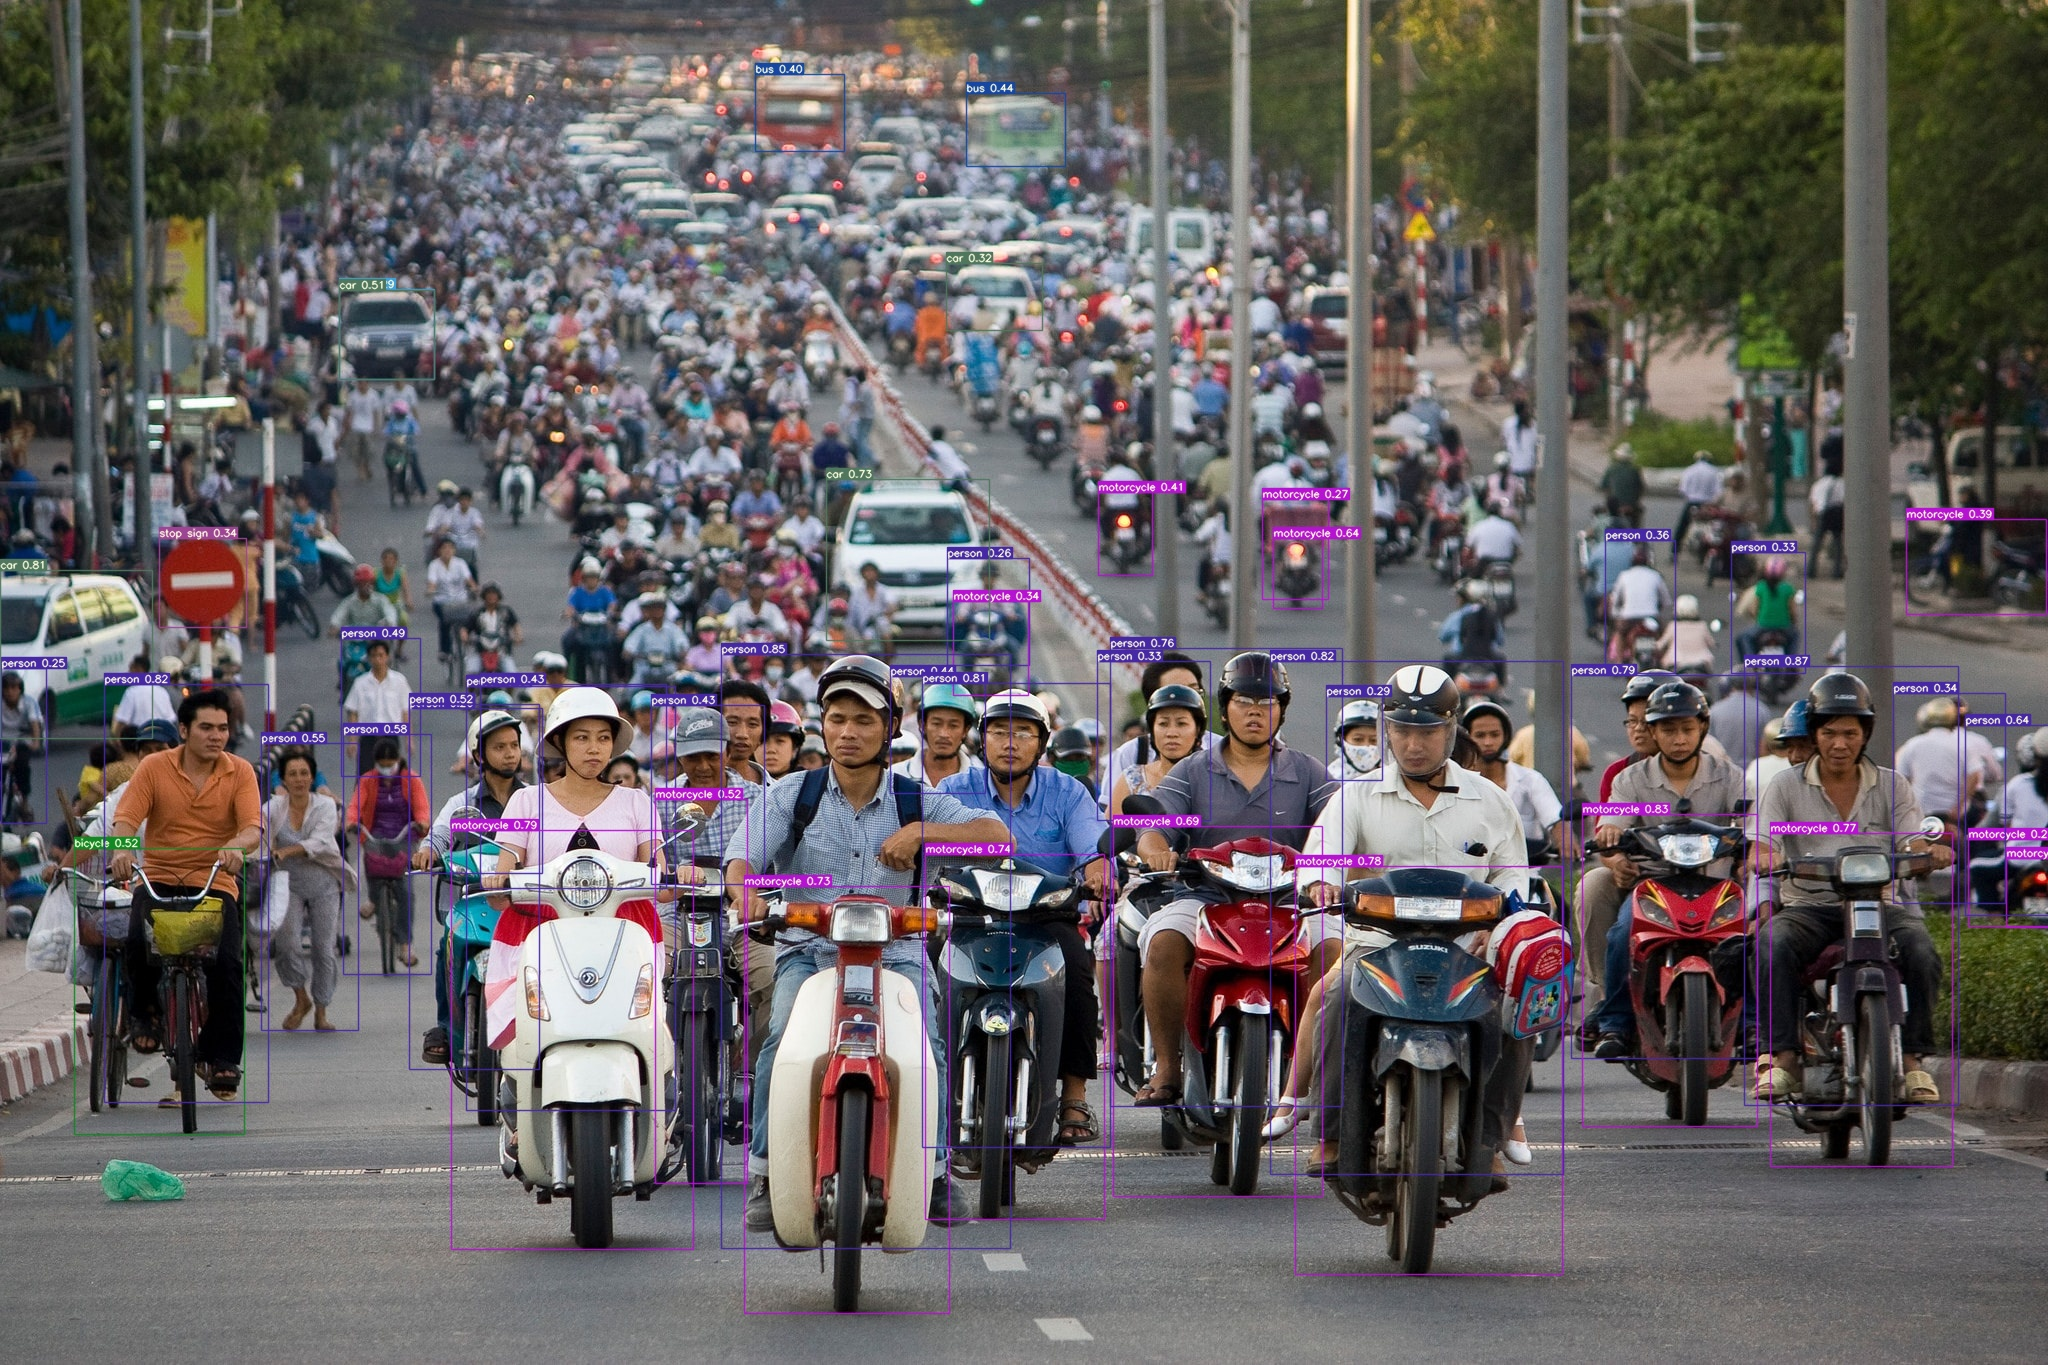

In [ ]:
# Xem ảnh đã nhận diện
from IPython.display import Image, display
display(Image(filename="/content/yolov7/runs/detect/exp2/15271255494_fcc90d3f9b_k.jpg"))

#Train Model

In [ ]:
# Tổ chức lại thư mục train. Lý do: Vì YOLOv7 yêu cầu
# train
#   - images
#   - labels
# test
#   - images
#   - labels

%cd /content/drive/MyDrive/yolov7_train/train_data
!mkdir train
!mkdir train/images
!mkdir train/labels
!mv *.jpg train/images
!mv *.txt train/labels

In [ ]:
# Khai báo 1 file yaml để YOLOv7 biết:
# - Đường dẫn đến thư mục train, test (nếu có, nếu không thì dùng luôn đường dẫn đến train)
# - Số lượng class qua biến nc (number of class)
# - Tên của các class
%cd /content/drive/MyDrive/yolov7_train/yolov7
!rm data/mydataset.yaml # nếu có
!echo 'train: ../train_data/train' >> data/mydataset.yaml
!echo 'val: ../train_data/train' >> data/mydataset.yaml
!echo 'nc: 1' >> data/mydataset.yaml
!echo "names: ['fire']" >> data/mydataset.yaml